In [1]:
import pandas as pd
import numpy as np

from pathlib import Path

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
dataset_csv_path = Path('al_strategies_log/least_confidence_analyse')

dataset_csv_path.is_dir()

True

In [52]:
al_datasets_paths = list(dataset_csv_path.glob('*.csv'))
len(al_datasets_paths)

87

In [53]:
al_datasets_paths = sorted(al_datasets_paths, key = lambda _path: _path.stat().st_mtime)
#al_datasets_paths

In [54]:
dfs = [pd.read_csv(_path) for _path in al_datasets_paths]
[df.insert(0, "dataset_id", df_i * np.ones(len(dfs[df_i]), dtype=int), True) for df_i, df in enumerate(dfs)]
len(dfs)

87

In [55]:
one_big_df = pd.concat(dfs)

In [56]:
one_big_df

,dataset_id,label_str,text_cleaned
0,0,soc,michael siemon writes bryan whitsell writes on...
1,0,soc,michael bushnell writes socalled creed athanas...
2,0,talk,nicene creed believe one god father almighty m...
3,0,soc,vera shanti noyes writes indicates may believe...
4,0,sci,got recipe watier greek island samos use sprea...
...,...,...,...
27,86,comp,hey alli got equation editor since didnt autom...
28,86,comp,article philip n spiro writes george theall wr...
29,86,comp,article tom fisk stm writes article robertson ...
30,86,comp,article zvi guter writes author wcl current ca...


### Random weight sampler training

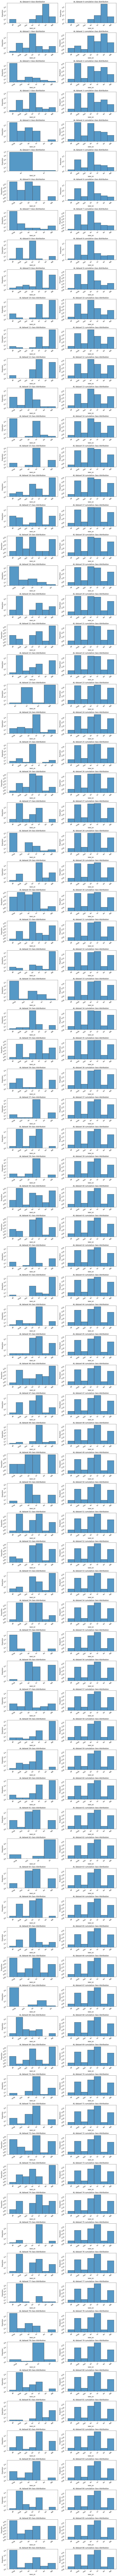

In [58]:
dfs_to_vis = dfs[:100]

num_dataframes = len(dfs_to_vis)
label_column = 'label_str'


unique_values = sorted(one_big_df[label_column].unique())


f, axs = plt.subplots(
    num_dataframes, 
    2, 
    figsize=(12, num_dataframes * 3),
#    gridspec_kw=dict(height_ratios=[6, 6, 6])
)

for _df_i, _df in enumerate(dfs_to_vis):
    
    
    _df[label_column] = pd.Categorical(_df[label_column], unique_values)
    sns.histplot(data=_df[label_column], ax=axs[_df_i, 0], stat='proportion')
    axs[_df_i, 0].set_title(f'AL dataset {_df_i} class distribution')
    axs[_df_i, 0].tick_params(rotation=30)
    
    _df = pd.concat(dfs[:(_df_i + 1)])
    _df[label_column] = pd.Categorical(_df[label_column], unique_values)
    sns.histplot(data=_df[label_column], ax=axs[_df_i, 1], stat='proportion')
    axs[_df_i, 1].set_title(f'AL dataset {_df_i} cumulative class distribution')
    axs[_df_i, 1].tick_params(rotation=30)
    
f.tight_layout()

### Non weighted by sampler learning

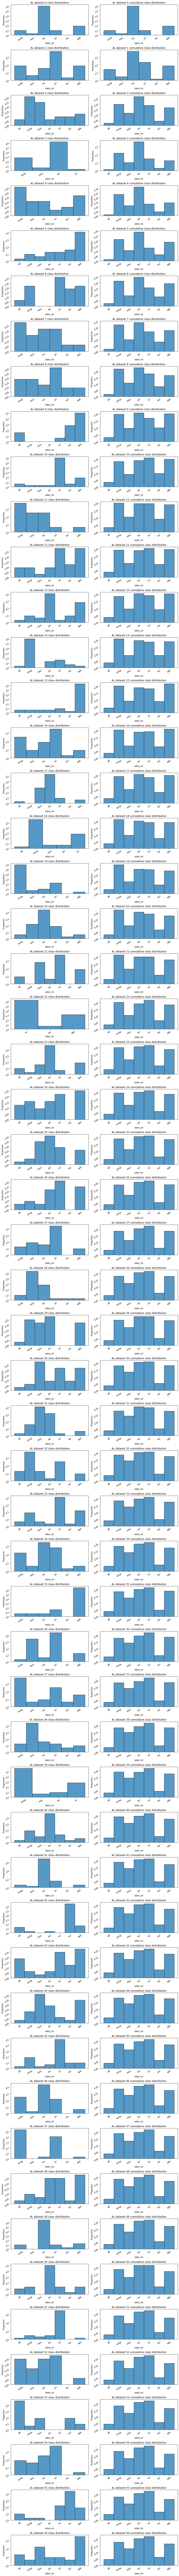

In [48]:
# dfs_to_vis = dfs[:100]

# num_dataframes = len(dfs_to_vis)
# label_column = 'label_str'


# unique_values = sorted(one_big_df[label_column].unique())


# f, axs = plt.subplots(
#     num_dataframes, 
#     2, 
#     figsize=(12, num_dataframes * 3),
# #    gridspec_kw=dict(height_ratios=[6, 6, 6])
# )

# for _df_i, _df in enumerate(dfs_to_vis):
    
    
#     _df[label_column] = pd.Categorical(_df[label_column], unique_values)
#     sns.histplot(data=_df[label_column], ax=axs[_df_i, 0], stat='proportion')
#     axs[_df_i, 0].set_title(f'AL dataset {_df_i} class distribution')
#     axs[_df_i, 0].tick_params(rotation=30)
    
#     _df = pd.concat(dfs[:(_df_i + 1)])
#     _df[label_column] = pd.Categorical(_df[label_column], unique_values)
#     sns.histplot(data=_df[label_column], ax=axs[_df_i, 1], stat='proportion')
#     axs[_df_i, 1].set_title(f'AL dataset {_df_i} cumulative class distribution')
#     axs[_df_i, 1].tick_params(rotation=30)
    
# f.tight_layout()

### Training data distribution in each AL iteration

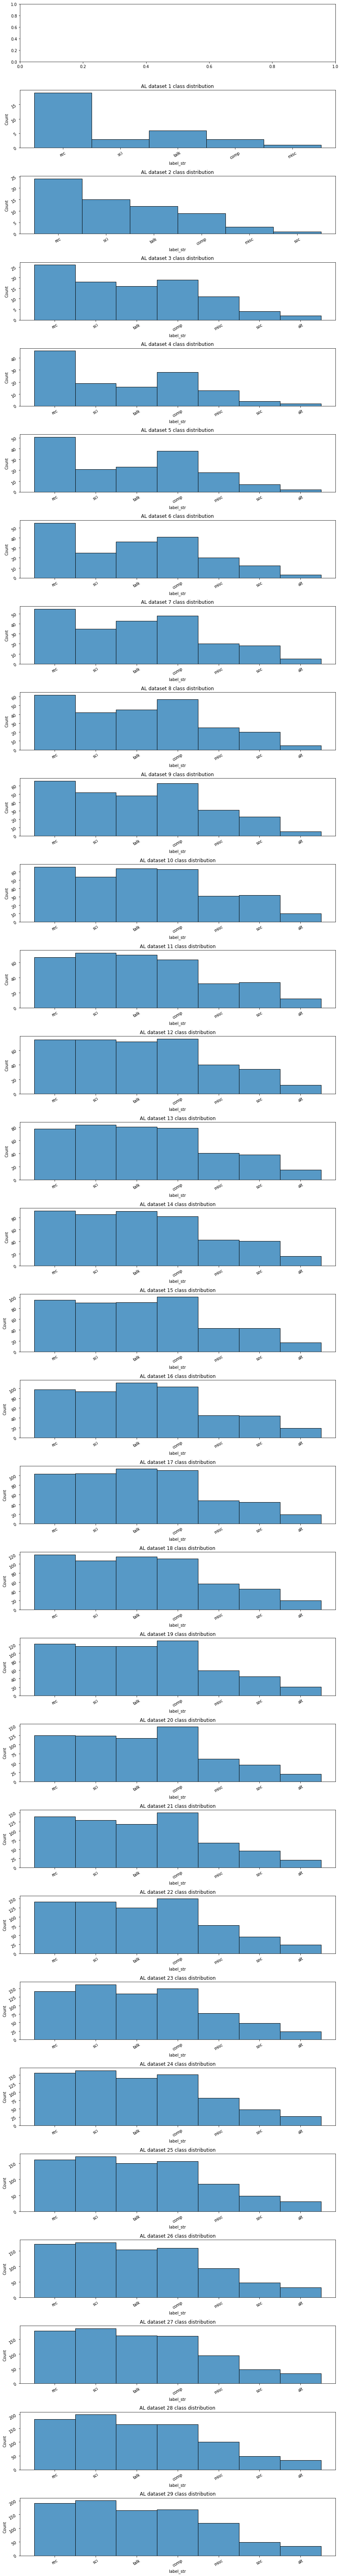

In [35]:
dfs_to_vis = dfs[:30]

num_dataframes = 30
label_column = 'label_str'

unique_values = one_big_df[label_column].unique()


f, axs = plt.subplots(
    num_dataframes, 
    1, 
    figsize=(12, num_dataframes * 3),
#    gridspec_kw=dict(height_ratios=[6, 6, 6])
)

for _df_i in range(1, num_dataframes):

    _df = pd.concat(dfs[:_df_i])
    _df[label_column] = pd.Categorical(_df[label_column], unique_values)
    sns.histplot(data=_df[label_column], ax=axs[_df_i])
    axs[_df_i].set_title(f'AL dataset {_df_i} class distribution')
    axs[_df_i].tick_params(rotation=30)
    
f.tight_layout()

In [ ]:
label_column = 'label_reduced'

unique_values = X_train[label_column].unique()

X_train[label_column] = pd.Categorical(X_train[label_column], unique_values)
X_val[label_column] = pd.Categorical(X_val[label_column], unique_values)
X_test[label_column] = pd.Categorical(X_test[label_column], unique_values)

sns.set_palette("Paired")
f, axs = plt.subplots(3, 1, figsize=(18, 12), gridspec_kw=dict(height_ratios=[6, 6, 6]))
sns.histplot(data=X_train[label_column], ax=axs[0])
axs[0].set_title('Train dataset class distribution')
sns.histplot(data=X_val[label_column], ax=axs[1])
axs[1].set_title('Val dataset class distribution')
sns.histplot(data=X_test[label_column], ax=axs[2])
axs[2].set_title('Test dataset class distribution')

axs[0].tick_params(rotation=90)
axs[1].tick_params(rotation=90)
axs[2].tick_params(rotation=90)


f.tight_layout()


# X_train['airline_sentiment'].value_counts().plot(kind='bar');